In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar

In [2]:
bikes = pd.read_csv('Eco-Totem_Capital_City_Trail_Bike_Counts.csv')
bikes.head()

,Count_Date,Count,OBJECTID
0,6/23/2015 11:00,92.0,0
1,6/23/2015 12:00,191.0,1
2,6/23/2015 13:00,156.0,2
3,6/23/2015 14:00,155.0,3
4,6/23/2015 15:00,243.0,4


In [3]:
bikes["Date"] = pd.to_datetime(bikes["Count_Date"])
bikes["month"] = bikes.Date.dt.month
bikes["year"] = bikes.Date.dt.year
bikes["day"] = bikes.Date.dt.day
bikes["hour"] = bikes.Date.dt.hour
bikes["day_of_week"] = bikes.Date.dt.dayofweek

bikes.head()

,Count_Date,Count,OBJECTID,Date,month,year,day,hour,day_of_week
0,6/23/2015 11:00,92.0,0,2015-06-23 11:00:00,6,2015,23,11,1
1,6/23/2015 12:00,191.0,1,2015-06-23 12:00:00,6,2015,23,12,1
2,6/23/2015 13:00,156.0,2,2015-06-23 13:00:00,6,2015,23,13,1
3,6/23/2015 14:00,155.0,3,2015-06-23 14:00:00,6,2015,23,14,1
4,6/23/2015 15:00,243.0,4,2015-06-23 15:00:00,6,2015,23,15,1


In [4]:
def map_season(x):
    if x < 3 or x > 11:
        return "winter"
    elif x >= 3 and x <= 4:
        return "spring"
    elif x >= 5 and x <= 8:
        return "summer"
    else:
        return "fall"
    
bikes["season"] = bikes["month"].apply(map_season)
bikes.head()

,Count_Date,Count,OBJECTID,Date,month,year,day,hour,day_of_week,season
0,6/23/2015 11:00,92.0,0,2015-06-23 11:00:00,6,2015,23,11,1,summer
1,6/23/2015 12:00,191.0,1,2015-06-23 12:00:00,6,2015,23,12,1,summer
2,6/23/2015 13:00,156.0,2,2015-06-23 13:00:00,6,2015,23,13,1,summer
3,6/23/2015 14:00,155.0,3,2015-06-23 14:00:00,6,2015,23,14,1,summer
4,6/23/2015 15:00,243.0,4,2015-06-23 15:00:00,6,2015,23,15,1,summer


In [28]:
bikes_2019 = bikes[bikes['year'] == 2019]
bikes_2020 = bikes[bikes['year'] == 2020]
avg_bikes_2019 = bikes_2019.groupby('month').mean()
avg_bikes_2020 = bikes_2020.groupby('month').mean()
months = [x for x in range(13)]
months = pd.Series(months).apply(lambda x: calendar.month_abbr[x])
avg_bikes_2019['Month'] = months
months = [x for x in range(7)]
months = pd.Series(months).apply(lambda x: calendar.month_abbr[x])
avg_bikes_2020['Month'] = months
avg_bikes_2020

,Count,OBJECTID,year,day,hour,day_of_week,Month
month,,,,,,,
1,14.997312,40031.5,2020.0,16.000000,11.500000,3.000000,Jan
2,16.590517,40751.5,2020.0,15.000000,11.500000,3.068966,Feb
3,32.185734,41471.0,2020.0,16.010767,11.512786,2.931359,Mar
4,53.002778,42202.5,2020.0,15.500000,11.500000,2.966667,Apr
5,86.436828,42934.5,2020.0,16.000000,11.500000,3.193548,May
6,107.030556,43666.5,2020.0,15.500000,11.500000,2.833333,Jun


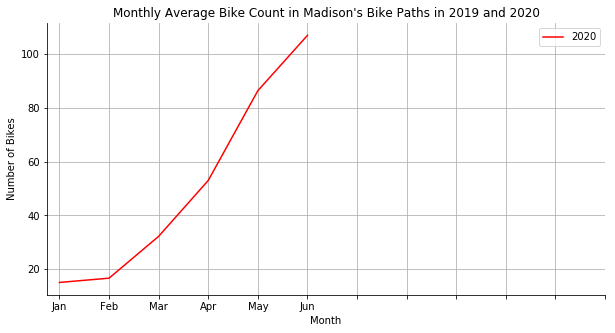

In [31]:
fig, ax = plt.subplots(figsize=(10,5))
plt.tick_params(axis='both', which='major', labelsize=10)
avg_bikes_2020.plot.line(y = 'Count', ax=ax, grid = True, label = '2020', color = 'red')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticklabels(avg_bikes_2020['Month'], rotation=0)
ax.set_title("Monthly Average Bike Count in Madison's Bike Paths in 2019 and 2020")
ax.set_ylabel('Number of Bikes')
ax.set_xlabel('Month')
ax.xaxis.set_ticks(np.arange(1, 13))

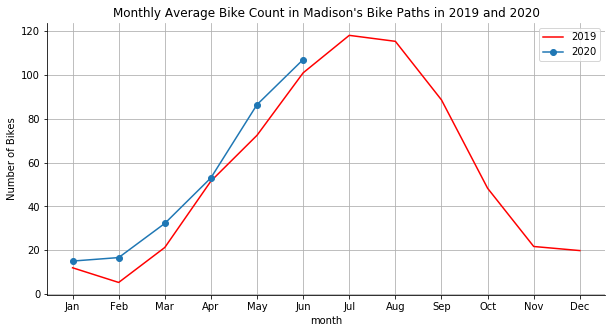

In [6]:
fig, ax = plt.subplots(figsize=(10,5))
plt.tick_params(axis='both', which='major', labelsize=10)
avg_bikes_2019.plot.line(y = 'Count', ax=ax, grid = True, label = '2019', color = 'red')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticklabels(avg_bikes_2019['Month'], rotation=0)
ax.set_title("Monthly Average Bike Count in Madison's Bike Paths in 2019 and 2020")
ax.set_ylabel('Number of Bikes')
ax.set_xlabel('Month')
ax.xaxis.set_ticks(np.arange(1, 13))
avg_bikes_2020.plot.line(y = 'Count', ax=ax, grid = True, label = '2020', marker = 'o')

In [7]:
weather = pd.read_csv('Weather Data.csv')
weather.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,DAPR,MDPR,PGTM,...,WESF,WSF2,WSF5,WT01,WT02,WT03,WT04,WT06,WT08,WT09
0,US1WIDA0045,"MADISON 6.1 W, WI US",43.069488,-89.507887,321.6,2020-01-01,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,US1WIDA0045,"MADISON 6.1 W, WI US",43.069488,-89.507887,321.6,2020-01-02,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,US1WIDA0045,"MADISON 6.1 W, WI US",43.069488,-89.507887,321.6,2020-01-03,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,US1WIDA0045,"MADISON 6.1 W, WI US",43.069488,-89.507887,321.6,2020-01-04,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,US1WIDA0045,"MADISON 6.1 W, WI US",43.069488,-89.507887,321.6,2020-01-05,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
smaller_weather = weather.groupby("DATE").mean()[['TMAX', 'TMIN', 'PRCP', 'SNOW']]
smaller_weather.head()

,TMAX,TMIN,PRCP,SNOW
DATE,,,,
2020-01-01,32.666667,13.333333,0.0,0.0
2020-01-02,40.333333,33.000000,0.0,0.0
2020-01-03,43.666667,28.333333,0.0,0.0
2020-01-04,33.666667,27.000000,0.0,0.0
2020-01-05,34.666667,21.666667,0.0,0.0


In [9]:
smaller_weather["Date"] = pd.to_datetime(smaller_weather.index)
smaller_weather["Month"] = smaller_weather.Date.dt.month
smaller_weather.tail()

,TMAX,TMIN,PRCP,SNOW,Date,Month
DATE,,,,,,
2020-09-27,73.666667,57.000000,0.015882,0.0,2020-09-27,9
2020-09-28,65.666667,49.000000,0.298095,0.0,2020-09-28,9
2020-09-29,58.666667,41.333333,0.052632,0.0,2020-09-29,9
2020-09-30,57.500000,44.000000,0.003333,0.0,2020-09-30,9
2020-10-01,60.000000,43.000000,0.021333,0.0,2020-10-01,10


In [10]:
smaller_weather['Month Name'] = smaller_weather['Month'].apply(lambda x: calendar.month_abbr[x])
monthly_weather = smaller_weather.groupby("Month Name").mean().sort_values(by = 'Month')
monthly_weather = monthly_weather.set_index('Month')
months = [x for x in range(11)]
months = pd.Series(months).apply(lambda x: calendar.month_abbr[x])
monthly_weather['Month Name'] = months
monthly_weather['TMEAN'] = None
for idx, row in monthly_weather.iterrows():
    monthly_weather['TMEAN'].loc[idx] = (row['TMAX'] + row['TMIN'])/2
monthly_weather

C:\Users\cs301\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,TMAX,TMIN,PRCP,SNOW,Month Name,TMEAN
Month,,,,,,
1,32.537634,19.053763,0.061902,0.507134,Jan,25.7957
2,32.275862,14.195402,0.035251,0.451087,Feb,23.2356
3,45.806452,29.763441,0.113019,0.076011,Mar,37.7849
4,55.483333,34.311111,0.075789,0.000769,Apr,44.8972
5,66.688172,46.096774,0.173907,0.000269,May,56.3925
6,81.566667,57.855556,0.209626,0.000000,Jun,69.7111
7,85.365591,64.887097,0.190335,0.000000,Jul,75.1263
8,83.096774,59.268817,0.037091,0.000000,Aug,71.1828
9,70.333333,50.000000,0.148123,0.000000,Sep,60.1667


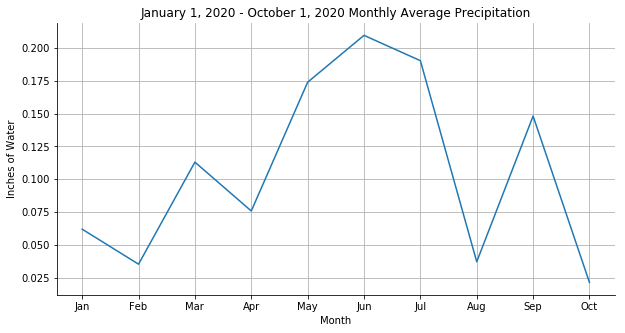

In [11]:
fig, ax = plt.subplots(figsize=(10,5))
plt.tick_params(axis='both', which='major', labelsize=10)
monthly_weather.plot.line(x = 'Month Name', y = 'PRCP', ax=ax, grid = True, legend = False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticklabels(monthly_weather['Month Name'], rotation=0)
ax.set_title('January 1, 2020 - October 1, 2020 Monthly Average Precipitation')
ax.set_ylabel('Inches of Water')
ax.set_xlabel('Month')
ax.xaxis.set_ticks(np.arange(0, 10))

[Text(0,0,'Jan'),
 Text(0,0,'Feb'),
 Text(0,0,'Mar'),
 Text(0,0,'Apr'),
 Text(0,0,'May'),
 Text(0,0,'Jun'),
 Text(0,0,'Jul'),
 Text(0,0,'Aug'),
 Text(0,0,'Sep'),
 Text(0,0,'Oct')]

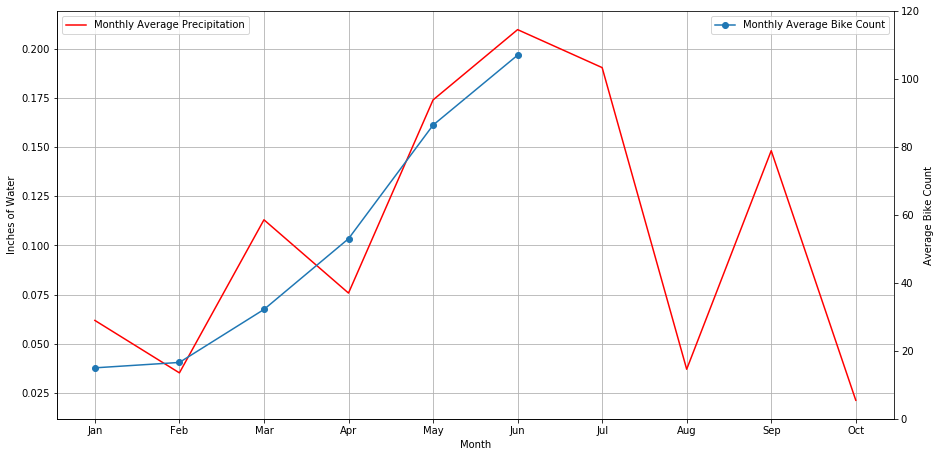

In [32]:
fig, ax1 = plt.subplots(figsize=(15,7.5))
plt.tick_params(axis='both', which='major', labelsize=10)
monthly_weather.plot.line(x = 'Month Name', y = 'PRCP', ax=ax1, grid = True, label = 'Monthly Average Precipitation', color = 'red')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.xaxis.set_ticklabels(monthly_weather['Month Name'], rotation=0)
#ax.set_title('January 1, 2020 - October 1, 2020 Monthly Average Air Temperature')
ax1.set_ylabel('Inches of Water')
ax1.set_xlabel('Month')
ax1.legend(loc = 'upper left')
#ax1.set_ylim(20, 80)
#ax1.set_xlim(0, 6)
ax1.xaxis.set_ticks(np.arange(0, 10))
ax2 = ax1.twinx()
avg_bikes_2020.plot.line(x = 'Month', y = 'Count', ax=ax2, grid = False, label = 'Monthly Average Bike Count', marker = 'o')
ax2.set_ylim(0, 120)
ax2.set_ylabel('Average Bike Count')
ax2.xaxis.set_ticklabels(monthly_weather['Month Name'], rotation=0)

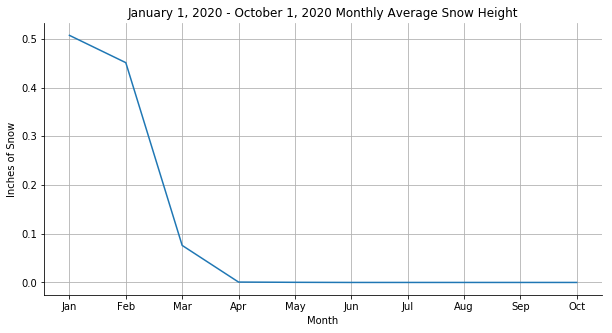

In [13]:
fig, ax = plt.subplots(figsize=(10,5))
plt.tick_params(axis='both', which='major', labelsize=10)
monthly_weather.plot.line(x = 'Month Name', y = 'SNOW', ax=ax, grid = True, legend = False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticklabels(monthly_weather['Month Name'], rotation=0)
ax.set_title('January 1, 2020 - October 1, 2020 Monthly Average Snow Height')
ax.set_ylabel('Inches of Snow')
ax.set_xlabel('Month')
ax.xaxis.set_ticks(np.arange(0, 10))

[Text(0,0,'Jan'),
 Text(0,0,'Feb'),
 Text(0,0,'Mar'),
 Text(0,0,'Apr'),
 Text(0,0,'May'),
 Text(0,0,'Jun'),
 Text(0,0,'Jul'),
 Text(0,0,'Aug'),
 Text(0,0,'Sep'),
 Text(0,0,'Oct')]

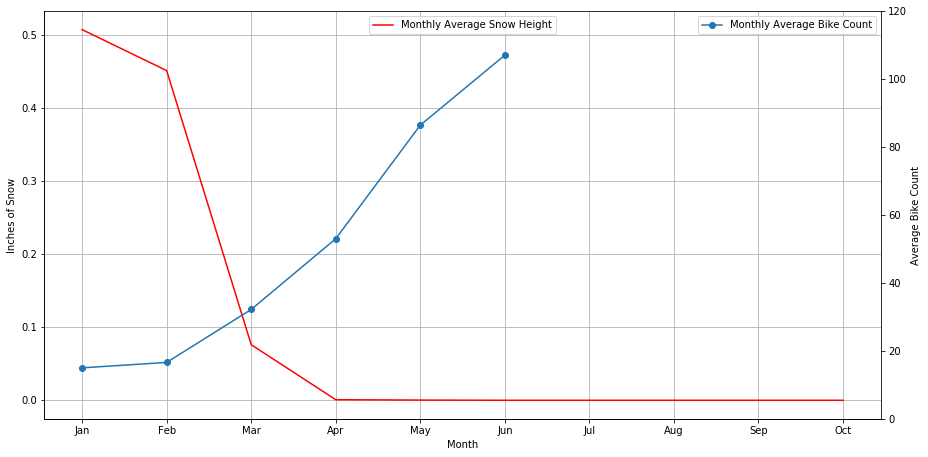

In [37]:
fig, ax1 = plt.subplots(figsize=(15,7.5))
plt.tick_params(axis='both', which='major', labelsize=10)
monthly_weather.plot.line(x = 'Month Name', y = 'SNOW', ax=ax1, grid = True, label = 'Monthly Average Snow Height', color = 'red')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.xaxis.set_ticklabels(monthly_weather['Month Name'], rotation=0)
#ax.set_title('January 1, 2020 - October 1, 2020 Monthly Average Air Temperature')
ax1.set_ylabel('Inches of Snow')
ax1.set_xlabel('Month')
ax1.legend(loc = 'upper center')
#ax1.set_ylim(20, 80)
#ax1.set_xlim(0, 6)
ax1.xaxis.set_ticks(np.arange(0, 10))
ax2 = ax1.twinx()
avg_bikes_2020.plot.line(x = 'Month', y = 'Count', ax=ax2, grid = False, label = 'Monthly Average Bike Count', marker = 'o')
ax2.set_ylim(0, 120)
ax2.set_ylabel('Average Bike Count')
ax2.legend(loc = 'upper right')
ax2.xaxis.set_ticklabels(monthly_weather['Month Name'], rotation=0)

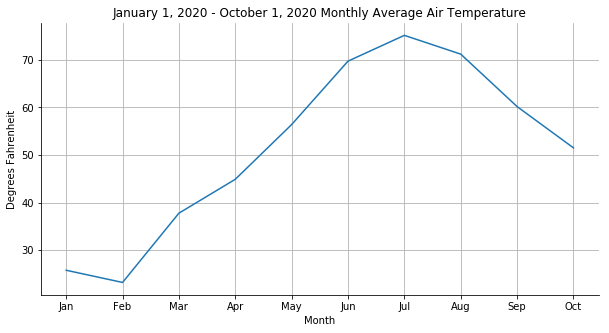

In [15]:
fig, ax = plt.subplots(figsize=(10,5))
plt.tick_params(axis='both', which='major', labelsize=10)
monthly_weather.plot.line(x = 'Month Name', y = 'TMEAN', ax=ax, grid = True, legend = False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticklabels(monthly_weather['Month Name'], rotation=0)
ax.set_title('January 1, 2020 - October 1, 2020 Monthly Average Air Temperature')
ax.set_ylabel('Degrees Fahrenheit')
ax.set_xlabel('Month')
ax.xaxis.set_ticks(np.arange(0, 10))

[Text(0,0,'Jan'),
 Text(0,0,'Feb'),
 Text(0,0,'Mar'),
 Text(0,0,'Apr'),
 Text(0,0,'May'),
 Text(0,0,'Jun'),
 Text(0,0,'Jul'),
 Text(0,0,'Aug'),
 Text(0,0,'Sep'),
 Text(0,0,'Oct')]

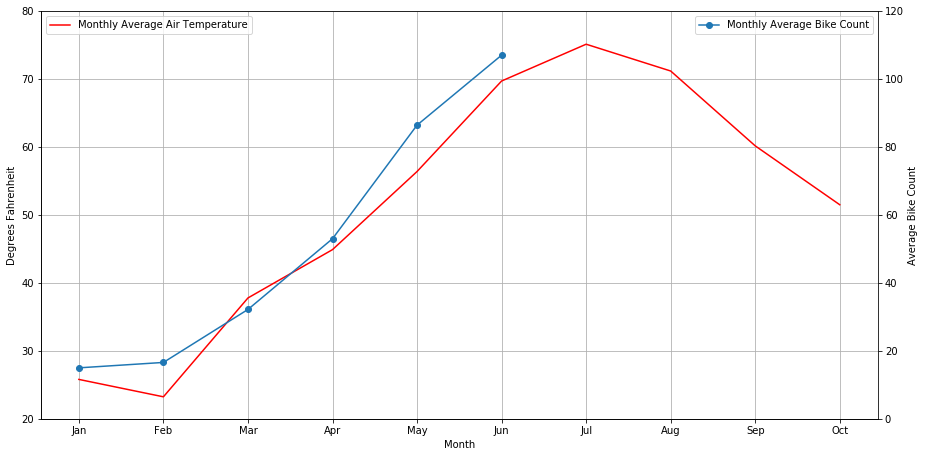

In [35]:
fig, ax1 = plt.subplots(figsize=(15,7.5))
plt.tick_params(axis='both', which='major', labelsize=10)
monthly_weather.plot.line(x = 'Month Name', y = 'TMEAN', ax=ax1, grid = True, label = 'Monthly Average Air Temperature', color = 'red')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.xaxis.set_ticklabels(monthly_weather['Month Name'], rotation=0)
#ax.set_title('January 1, 2020 - October 1, 2020 Monthly Average Air Temperature')
ax1.set_ylabel('Degrees Fahrenheit')
ax1.set_xlabel('Month')
ax1.set_ylim(20, 80)
ax1.legend(loc = 'upper left')
#ax1.set_xlim(0, 6)
ax1.xaxis.set_ticks(np.arange(0, 10))
ax2 = ax1.twinx()
avg_bikes_2020.plot.line(x = 'Month', y = 'Count', ax=ax2, grid = False, label = 'Monthly Average Bike Count', marker = 'o')
ax2.set_ylim(0, 120)
ax2.set_ylabel('Average Bike Count')
ax2.xaxis.set_ticklabels(monthly_weather['Month Name'], rotation=0)